/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


流式输出内容被截断，只能显示最后 5000 行内容。
1/1 [==============================] - 0s 23ms/step
Episode 167: Reward = 31.0
1/1 [==============================] - 0s 44ms/step
Episode 168: Reward = 41.0
1/1 [==============================] - 0s 21ms/step
Episode 169: Reward = 19.0
1/1 [==============================] - 0s 23ms/step
Episode 170: Reward = 16.0
1/1 [==============================] - 0s 21ms/step
Episode 171: Reward = 21.0
1/1 [==============================] - 0s 22ms/step
Episode 172: Reward = 13.0
1/1 [==============================] - 0s 30ms/step
Episode 173: Reward = 9.0
1/1 [==============================] - 0s 38ms/step
Episode 174: Reward = 9.0
1/1 [==============================] - 0s 25ms/step
Episode 175: Reward = 13.0
1/1 [==============================] - 0s 28ms/step
Episode 176: Reward = 9.0
1/1 [==============================] - 0s 20ms/step
Episode 177: Reward = 13.0
1/1 [==============================] - 0s 29ms/step
Episode 178: Reward = 10.0
1/1 [=======================

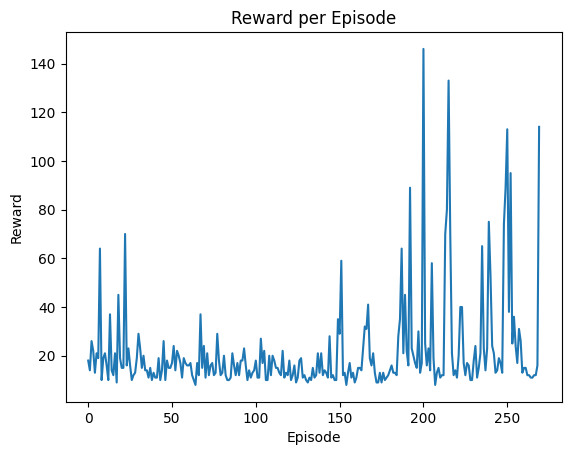

In [9]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt

# 创建环境
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# 定义DQN模型
class DQN(tf.keras.Model):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(24, activation='relu')
        self.fc2 = tf.keras.layers.Dense(24, activation='relu')
        self.fc3 = tf.keras.layers.Dense(action_size)

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return self.fc3(x)

# 初始化DQN模型和优化器
model = DQN(state_size, action_size)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 定义epsilon-greedy策略
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(action_size)
    else:
        q_values = model.predict(state[np.newaxis])
        return np.argmax(q_values[0])

# 训练DQN模型
def train_dqn(env, model, optimizer, epsilon_decay=0.995, min_epsilon=0.01,
              gamma=0.99, max_episodes=270, max_steps_per_episode=1000, batch_size=64):
    epsilon = 1.0
    episode_rewards = []  # 用于存储每个episode的得分
    for episode in range(max_episodes):
        state = env.reset()
        episode_reward = 0
        for step in range(max_steps_per_episode):
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            episode_reward += reward

            # 计算target Q值
            target = reward + (1 - done) * gamma * np.max(model.predict(next_state[np.newaxis]))

            # 计算当前状态的Q值
            with tf.GradientTape() as tape:
                q_values = model(state[np.newaxis])
                action_mask = tf.one_hot(action, action_size)
                current_q = tf.reduce_sum(tf.multiply(q_values, action_mask), axis=1)
                loss = tf.reduce_mean(tf.square(target - current_q))

            # 计算梯度并更新模型
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            if done:
                break

            state = next_state

        # 更新epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        episode_rewards.append(episode_reward)  # 记录当前episode的得分
        print(f"Episode {episode + 1}: Reward = {episode_reward}")

    # 绘制得分曲线
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    plt.show()

# 训练DQN模型
train_dqn(env, model, optimizer)
